# Import Libraries

In [100]:
!pip install pyldavis

    100% |████████████████████████████████| 1.6MB 7.0MB/s eta 0:00:01
  Stored in directory: /Users/hamiltonchang/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [1]:
import pandas as pd
import nltk
from nltk import punkt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer 
from tqdm import tqdm
pd.options.display.max_columns = 999
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import Word
from textblob import TextBlob
from textblob import TextBlob
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim

In [2]:
lemmatizer = WordNetLemmatizer() 

In [3]:
morestops = ['light', 'main', 'appetizer', 'city', 'left', 'felt', 'pot', 'chinese', 'hot', 'name', 'sure', 'walked',
            'sit', 'door', 'yelp', 'group', 'options', 'portions', 'find', 'absolutely', 'neighborhood','ice',
            'desserts', 'enjoyed', 'courses', 'busy', 'large', 'friday', '4', 'able', 'packed', 'reservations',
            'saturday', 'reservation', 'full', 'average', 'feel', 'looking', 'gave', 'brought', 'must', 'york',
            'michelin', 'not', 'can', 'tell', 'home', 'awesome', 'different', 'bbq', 'lot', 'size', 'amount', 'plate',
            'long', 'theres', 'open', 'line', 'big', 'crowded', 'seated', 'lovely', 'cozy', 'waiting', 'sat', 'seats',
            'inside', 'cool', 'wall', 'walk', 'front', 'free', 'old', 'sometimes', 'usually', 'yes', 'theyre', 'youll',
            'often', 'isnt', 'things', 'gem', 'bill', 'cash', 'bland', 'room', 'end', 'view', 'evening','waited', 
            '20', '5', 'friendly', 'loud', 'fun', 'mexican', 'coming', 'enjoy', 'greek', 'outdoor', 'warm', 'not',
            'can', 'oh', 'wrong', 'na', 'street', 'cocktail', 'beers', 'glass', 'brooklyn', 'manhattan', 'may', 'bottle',
            'started', 'tender', 'slow', 'sauce', 'sweet', 'seating', 'lunch', 'menu', 'stars', 'quality', 'nothing', 'worth', 'reservation',
         'recommend', 'spot', 'happy', 'everything', 'cooked', 'bread', 'outside', 'tables', 'location', 'mac', 
         'course', 'made', 'never', 'another', 'know', 'take', 'korean', 'french', 'italian', 'sauce', 'area', 'even', 'said', 'took', 'people', 'could', 'wait', 'first', 'always', 'go', 'love', 'new', 'im', 
                 'come', 'favorite', 'times', 'excellent', 'night','hour', 'pretty', 'bit', 'small', 'little', 
                 'though', 'much', 'think', 'better', 'quite', 'spicy','side', 'time', 'definitely', 'would', 'delicious', 'dont', 'dish', 'ordered', 'table', 'place', 'nice', 
            'bar', 'also', 'came', 'great', 'good', 'amazing', 'restaurant', 'really', 'well', 'bad', 'minutes', 
            'nice', 'back', 'best', 'ive', 'like','dont','get', 'us', 'came', 'order','minutes','one', 'asked', 
            'got', 'didnt', 'perfectly', 'meal', 'dishes', 'cream', 'want', 'make', 'youre', 'eat', 'way', 'thats', 'say',
          'need', 'see', 'something', 'dinner', 'every', 'highly', 'wonderful', 'nyc', 'perfect', 'told',
          'drinks', 'wanted', 'went', 'wasnt', 'taste', 'overall', '2', '3', 'around', 'japanese', 'flavor', 'rib',
          'can', 'not', 'oh', 'lol', 'point', 'wife', 'brooklyn',' vietnamese', 'bite', 'n', 'enough', 'although',
          'expect', 'per', 'person', 'tender', 'flavorful', 'green', 'tasted', 'texture', 'give', 'going', 'still', 'ever', 'reviews', 'review', 'cant', 'many', 'restaurants', 'wine', 'dining',
             'top', 'beautiful', 'special', 'tasting', 'birthday', 'incredible', 'fried', 'sunday', 'water', 'friend',
             'drink', 'friends', 'super', 'music', 'cocktails', 'vibe', 'space', 'coffee', 'medium', 'meat', 'rare',
             'grill', 'cut', 'bone', 'roasted', 'fresh', 'brunch', 'breakfast', 'dessert', 'toast', 'two', 'dessert',
             'seafood', 'perfectly', 'meal', 'dishes', 'cream', 'want', 'make', 'youre', 'eat', 'way', 'thats', 'say',
          'need', 'see', 'something', 'dinner', 'every', 'highly', 'wonderful', 'nyc', 'perfect', 'told',
          'drinks', 'wanted', 'went', 'wasnt', 'taste', 'overall', '2', '3', 'around', 'japanese', 'flavor', 'rib',
          'can', 'not', 'oh', 'lol', 'point', 'wife', 'brooklyn',' vietnamese', 'bite', 'n', 'enough', 'although',
          'expect', 'per', 'person', 'tender', 'flavorful', 'green', 'tasted', 'texture', 'tea', 'thai', 'ask', 'arrived', 'party', 'cake', 'date', 'selection', 'cute', 'try',
              'bowl', 'probably', 'high', 'however', 'id', 'decent', 'maybe', 'places', 'village', 'east', 'tapas',
              'west', 'sangria', 'de', 'margaritas', 'dan', 'visit', 'last', 'family', 'years', 'everyone', 'thank',
              'hearing','tons','rave','finally','decided','actually','second','puts','bring','youd','impress','list', 
               'personally', 'neighborhood', 'loved', 'fantastic', 'absolutely', 'grilled', 'tasty', 'crispy',
              'portion', 'served', 'day', 'right', 'party', 'next', 'since', 'away', 'arrived', 'ok', 'however'
              'maybe', 'tip', 'star', 'okay', 'short', 'flavors', 'vegan', 'la', 'unique', 'ingredients',
              'interesting', 'cuisine', 'time', 'definitely', 'would', 'delicious', 'dont', 'dish', 'ordered', 'table', 'place', 'nice', 
            'bar', 'also', 'came', 'great', 'good', 'amazing', 'restaurant', 'really', 'well', 'bad', 'minutes', 
            'nice', 'back', 'best', 'ive', 'like','dont','get', 'us', 'came', 'order','minutes','one', 'asked', 
            'got', 'didnt']

In [4]:
stops = ['thing', 'might', 'makes', 'eating', 'real', 'let', 'tried', 'far', 'reasonable', 'husband', 'truly',
        'pm', 'am', 'else', 'seemed', 'someone', 'good', 'like', 'really', 'place', 'would', 'pretty', 'bit', 'much',
        'better', 'great', 'amazing', 'place', 'delicous', 'back', 'good', 'definitely', 'best', 'love', 'recommend',
        'good', 'great', 'place', 'nice', 'really', 'bar', 'back', 'definitely', 'came', 'pretty', 'dish', 'ordered',
        'dessert', 'happy', 'hour', 'drinks', 'beer', 'bar', 'new', 'always', 'one', 'go', 'location', 'get', 'place',
        'york', 'us', 'time', 'table', 'one', 'order', 'get', 'came', 'would', 'back', 'even', 'course', 'wine',
        'dining', 'meal', 'course', 'dishes', 'impeccable', 'juicy', 'later', 'margarita', 'fine', 'hard', 'less',
        'especially', 'items', 'given', 'vietnamese', 'late', 'not', 'can', 'here', 'there', 'yummy']

In [5]:
stop.update(morestops)

In [6]:
stop.update(stops)

In [45]:
len(stop)

573

In [7]:
tokenizer = word_tokenize

In [8]:
df = pd.read_csv('cleanedManhattanfull.csv')

In [9]:
import string 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [ ]:
def recursive_len(item):
    if type(item) == list:
        return sum(recursive_len(subitem) for subitem in item)
    else:
        return 1

In [ ]:
df.head()

## Sample Run

In [ ]:
sample = df.iloc[0:1]

In [ ]:
sample

In [ ]:
sampledrop = ['review_'+str(x) for x in range(125,140)]

In [ ]:
sampledrop

In [ ]:
sample.drop(columns=sampledrop, axis=1, inplace=True)

In [ ]:
sample

In [ ]:
sample.drop(columns=['Unnamed: 0', 'price', 'rating', 'restaurant_id', 'review_count'], axis=1, inplace=True)

In [ ]:
sample

In [ ]:
rva = ['review_'+ str(x+1) for x in range(124)]

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df = df.fillna(value=str('none'))

In [ ]:
df.drop(columns=rva, inplace=True)

In [ ]:
sample.drop(columns=rva, inplace=True)

In [ ]:
sample.head()

In [ ]:
sample.drop(columns=['restaurant_name'], inplace=True)

In [ ]:
sample.head()

In [ ]:
for y in rva:
    sample[y] = sample[y].apply(remove_punctuations)

In [ ]:
for y in rva:
    sample[y] = sample[y].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stop)]))

In [ ]:
sample.head()

In [ ]:
for y in rva:
    sample[y] = sample[y].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos = 'r') for word in x.split()]))

In [ ]:
df.head()

In [ ]:
for y in tqdm(rva):
    sample['token_'+y]= sample[y].apply(tokenizer)

In [ ]:
sample.head()

In [ ]:
sample.values

In [ ]:
import numpy as np
tokenslist = sample.values.tolist()

In [ ]:
print(len(tokenslist[0][10]))

In [ ]:
tokenslist

In [ ]:
#FUNCTION TO FLATTEN TOKEN LIST

def flatten( alist ):
     newlist = []
     for item in alist:
         if isinstance(item, list):
             newlist = newlist + flatten(item)
         else:
             newlist.append(item)
     return newlist

In [ ]:
flattoken = flatten(tokenslist)

In [ ]:
print(len(flattoken))

In [ ]:
flattoken

In [ ]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(sample.values[0])

doc_term_matrix = [dictionary.doc2bow(doc) for doc in sample.values[0]]

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=100)

In [ ]:
print(ldamodel.print_topics(num_topics=10, num_words=10))

## Full Run

In [10]:
rva

NameError: name 'rva' is not defined

In [11]:
rva = ['review_'+ str(x+1) for x in range(139)]

In [ ]:
rem = ['review_'+ str(x+1) for x in range(124, 139)]

In [12]:
df = df.fillna(value=str('none'))

In [13]:
df.drop(columns=['Unnamed: 0', 'price', 'rating', 'restaurant_id', 'review_count'], axis=1, inplace=True)

In [14]:
for y in rva:
    df[y] = df[y].apply(remove_punctuations)

In [15]:
for y in rva:
    df[y] = df[y].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop]))

In [16]:
for y in tqdm(rva):
    df[y] = df[y].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos = 'r') for word in x.split()]))

100%|██████████| 139/139 [00:09<00:00, 14.02it/s]


In [17]:
for y in tqdm(rva):
    df['token_'+y]= df[y].apply(tokenizer)

100%|██████████| 139/139 [00:26<00:00, 12.92it/s]


In [ ]:
df.head()

In [18]:
df.drop(columns=rva, inplace=True)

In [19]:
df.drop(columns=['restaurant_name'], axis=1, inplace=True)

In [ ]:
df.head()

In [20]:
tokenslist = df.values.tolist()

In [ ]:
len(tokenslist)

In [ ]:
type(tokenslist)

In [ ]:
df.head()

In [ ]:
df['token_review_129'][0]

In [21]:
temp = []
for row in tokenslist:
    if len(row) > 1:
        temp.extend(row)
#remove below line for full run        
# temp = temp[0:50] + temp[1000:1100]

In [22]:
def deleting(list_1,del_name):
    for sub_list in tqdm(list_1):
        if del_name in sub_list:
            list_1.remove(sub_list)
    return list_1

deleting(temp, 'none')


 93%|█████████▎| 116441/124544 [00:14<00:00, 8154.93it/s]


[['half',
  'dozen',
  'oysters',
  'tuna',
  'tartare',
  'oysters',
  'tuna',
  'tartare',
  'plantain',
  'chips',
  'entrees',
  'split',
  'scallops',
  'octopus',
  'perfection'],
 ['liked',
  'saw',
  'turned',
  'case',
  'straight',
  'entrees',
  'surf',
  'turf',
  'hangar',
  'steak',
  'shrimp',
  'sugar',
  'snap',
  'peas',
  'fingerling',
  'potatoes',
  'balsamic',
  'reduction',
  'scallops',
  'deep',
  'diver',
  'scallops',
  'mushroom',
  'brown',
  'rice',
  'risotto',
  'delish',
  'reasonably',
  'priced',
  'looks',
  'change',
  'change',
  'serve',
  '7',
  'entrees',
  'overwhelmed',
  'offerings',
  'limited',
  'helps',
  'entrees',
  'faster',
  'reasonably',
  'portioned',
  'filling',
  'satisfied',
  'cailin',
  'recommendations',
  'surf',
  'turf',
  'hangar',
  'steak',
  'shrimp',
  'sugar',
  'snap',
  'peas',
  'fingerling',
  'potatoes',
  'balsamic',
  'reduction',
  'scallops',
  '18',
  'deep',
  'diver',
  'scallops',
  'mushroom',
  'brown

In [23]:
len(temp)

116440

In [29]:
def recursive_len(item):
    if type(item) == list:
        return sum(recursive_len(subitem) for subitem in item)
    else:
        return 1
recursive_len(temp)

3670954

### Full Run Corpus

In [ ]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(temp)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=8000)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in temp]


### Full Run LDA

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, per_word_topics=True, id2word = dictionary, passes=100, random_state=12)

In [ ]:
ldamodel.print_topics(num_topics=10, num_words=10)

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel2 = Lda(doc_term_matrix, num_topics=10, per_word_topics=True, id2word = dictionary, passes=100, random_state=15)

In [ ]:
ldamodel2.print_topics(num_topics=10, num_words=20)

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel3 = Lda(doc_term_matrix, num_topics=10, per_word_topics=True, id2word = dictionary, passes=100, random_state=15)

In [ ]:
ldamodel3.print_topics(num_topics=10, num_words=20)

### Full Run Multi-Core LDA

In [ ]:
lda_modelmulti = gensim.models.LdaMulticore(doc_term_matrix, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [ ]:
lda_modelmulti.print_topics(num_topics=10, num_words=20)

In [ ]:
lda_modelmulti2 = gensim.models.LdaMulticore(doc_term_matrix, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [ ]:
lda_modelmulti2.print_topics(num_topics=10, num_words=20)

In [ ]:
words_to_ignore = ['lamb', 'pork', 'beef', 'chicken', 'duck', 'oyster', 'clam', 'clams', 'oysters', 'cheese', 'eggs', 'bacon', 'pizza']

In [ ]:
lda_modelmulti3 = gensim.models.LdaMulticore(doc_term_matrix, num_topics=10, alpha='asymmetric', id2word=dictionary, passes=30, workers=2)

In [ ]:
lda_modelmulti3.print_topics(num_topics=10, num_words=20)

## Service Only Run

In [62]:
df = pd.read_csv('reviews_manhattan.csv')

In [11]:
df.head()

Unnamed: 0           Restaurant_Id  \
0           0  ehUuSk5gPTCQmwS_ubgKRA   
1           1  ehUuSk5gPTCQmwS_ubgKRA   
2           2  ehUuSk5gPTCQmwS_ubgKRA   
3           3  ehUuSk5gPTCQmwS_ubgKRA   
4           4  ehUuSk5gPTCQmwS_ubgKRA   

                                              Review  
0  Had a reservation on Saturday night for dinner...  
1  While it's not my new go-to place for seafood,...  
2  Mehhhhh. Overrated in my opinion.We walked in ...  
3  Unfortunately, dinner here was pretty disappoi...  
4  This place is overrated, i would give only 2 s...

In [63]:
df = df.fillna(value=str('none'))

In [64]:
df.drop(columns=['Unnamed: 0', 'Restaurant_Id'], axis=1, inplace=True)

In [65]:

df['Review'] = df['Review'].apply(remove_punctuations)


In [67]:
df['Review'] = df['Review'].str.replace('\d+', ' ')

In [68]:

df['Review'] = df['Review'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop]))

In [69]:
df1 = df[df['Review'].str.contains('service')]

In [70]:

df1['Review'] = df1['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos = 'v') for word in x.split()]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
df['Review']

0         half dozen oyster tuna tartare oyster tuna tar...
1         like saw turn case straight entrees surf turf ...
2         mehhhhh overrate opinion prob give hype surrou...
3         unfortunately disappoint rat surprise feel und...
4         overrate waitlist convenient fast food experie...
5         minute narrow closer together recommend half d...
6         twice blow simple yet rainbow trout swordfish ...
7         waiter extremely helpful struggle decision oys...
8         affordable tuesday glad except waiter greet qu...
9         oyster please stone nonetheless freak deal hou...
10        quick recap food general atmosphere service fo...
11        value money clam fettuccine clean sand steamer...
12        unheard trifecta cheap prepare excellently tho...
13        scallop mushroom risotto fettuccine clam fettu...
14        especially smaller acceptable price prepare se...
15        upstate specialize casual intimate allow witho...
16        mean favourite downside entire

In [71]:

df1['token_Review']= df1['Review'].apply(tokenizer)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
df1.drop(columns=['Review'], axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
tokenslist = df1.values.tolist()

In [74]:
temp = []
for row in tokenslist:
    if type(row) == list:
        temp.extend(row)

In [99]:
moreflat = []
for row in temp:
    if type(row) == list:
        moreflat.extend(row)

In [75]:
def deleting(list_1,del_name):
    for sub_list in tqdm(list_1):
        if del_name in sub_list:
            list_1.remove(sub_list)
    return list_1

deleting(temp, 'none')

 99%|█████████▉| 37400/37799 [00:00<00:00, 111431.62it/s]


[['mehhhhh',
  'overrate',
  'opinion',
  'prob',
  'hype',
  'surround',
  'lucky',
  'limit',
  'stay',
  'deal',
  'oyster',
  'service',
  'standard',
  'waiter',
  'knowledgeable',
  'unmemorable',
  'mediocre',
  'experience',
  'miss'],
 ['oyster',
  'please',
  'stone',
  'nonetheless',
  'freak',
  'deal',
  'hours',
  'additionally',
  'generally',
  'get',
  'thumb',
  'octopus',
  'soft',
  'pass',
  'escargot',
  'risotto',
  'fettuccine',
  'scallop',
  'dry',
  'clam',
  'creamy',
  'soon',
  'possible',
  'cold',
  'reason',
  'teeny',
  'tiny',
  'tune',
  'service',
  'affect',
  'term',
  'efficiency',
  'mind',
  'please'],
 ['quick',
  'recap',
  'food',
  'general',
  'atmosphere',
  'service',
  'food',
  'biggest',
  'peak',
  'hours',
  'grab',
  'quick',
  'healthier',
  'food',
  'pleasantly',
  'surprise',
  'sear',
  'tuna',
  'green',
  'mash',
  'potatoes',
  'heaven',
  'near',
  'bartender',
  'sample',
  'oyster',
  'already',
  'phenomenal',
  'ambian

In [166]:
def deleting(list_1,del_name):
    for sub_list in tqdm(list_1):
        if del_name in sub_list:
            list_1.remove(sub_list)
    return list_1

deleting(temp, stop)

100%|██████████| 29679/29679 [00:00<00:00, 219802.15it/s]


[['Mehhhhh',
  'Overrated',
  'in',
  'my',
  'opinion',
  'We',
  'walk',
  'in',
  'with',
  'no',
  'reservation',
  'which',
  'you',
  'prob',
  'shouldn',
  't',
  'do',
  'give',
  'the',
  'hype',
  'surround',
  'this',
  'place',
  'We',
  'be',
  'lucky',
  'enough',
  'to',
  'get',
  'a',
  'table',
  'and',
  'be',
  'give',
  'a',
  'time',
  'limit',
  'on',
  'how',
  'long',
  'we',
  'could',
  'stay',
  'no',
  'big',
  'deal',
  'The',
  'oyster',
  'be',
  'fresh',
  'and',
  'delicious',
  'service',
  'be',
  'standard',
  'waiter',
  'knowledgeable',
  'but',
  'to',
  'me',
  'it',
  'be',
  'overall',
  'an',
  'unmemorable',
  'mediocre',
  'din',
  'experience',
  'Maybe',
  'I',
  'miss',
  'something'],
 ['After',
  'hear',
  'tons',
  'of',
  'people',
  'rave',
  'about',
  'this',
  'spot',
  'I',
  've',
  'finally',
  'decide',
  'to',
  'give',
  'it',
  'a',
  'try',
  'I',
  've',
  'actually',
  'be',
  'back',
  'a',
  'second',
  'time',
  'so'

In [101]:
temp = [' '.join(x) for x in temp]

In [60]:
temp

['mehhhhh overrate opinion prob hype surround lucky limit stay deal oyster service standard waiter knowledgeable unmemorable mediocre experience miss',
 ['mehhhhh',
  'overrate',
  'opinion',
  'prob',
  'hype',
  'surround',
  'lucky',
  'limit',
  'stay',
  'deal',
  'oyster',
  'service',
  'standard',
  'waiter',
  'knowledgeable',
  'unmemorable',
  'mediocre',
  'experience',
  'miss'],
 ['oyster',
  'please',
  'stone',
  'nonetheless',
  'freak',
  'deal',
  'hours',
  'additionally',
  'generally',
  'get',
  'thumb',
  'octopus',
  'soft',
  'pass',
  'escargot',
  'risotto',
  'fettuccine',
  'scallop',
  'dry',
  'clam',
  'creamy',
  'soon',
  'possible',
  'cold',
  'reason',
  'teeny',
  'tiny',
  'tune',
  'service',
  'affect',
  'term',
  'efficiency',
  'mind',
  'please'],
 'quick recap food general atmosphere service food biggest peak hours grab quick healthier food pleasantly surprise sear tuna green mash potatoes heaven near bartender sample oyster already phenom

In [103]:
tfidf = TfidfVectorizer()

In [104]:
tfidf_review = tfidf.fit_transform(temp)

In [50]:
tfidf_review[0][0]

<1x86062 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [105]:
pf = pd.DataFrame(tfidf_review.toarray(), columns=tfidf.get_feature_names())

In [106]:
pf.shape

(37400, 44906)

In [108]:
pf.mehhhhh

0        0.370237
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.000000
           ...   
37370    0.000000
37371    0.000000
37372    0.000000
37373    0.000000
37374    0.000000
37375    0.000000
37376    0.000000
37377    0.000000
37378    0.000000
37379    0.000000
37380    0.000000
37381    0.000000
37382    0.000000
37383    0.000000
37384    0.000000
37385    0.000000
37386    0.000000
37387    0.000000
37388    0.000000
37389    0.000000
37390    0.000000
37391    0.000000
37392    0.000000
37393    0.000000
37394    0

In [107]:
pf.head()

aa  aaa  aaaaaaaaamazing  aaaaaaaaand  aaaaaand  aaaaalright  aaaaand  \
0  0.0  0.0              0.0          0.0       0.0          0.0      0.0   
1  0.0  0.0              0.0          0.0       0.0          0.0      0.0   
2  0.0  0.0              0.0          0.0       0.0          0.0      0.0   
3  0.0  0.0              0.0          0.0       0.0          0.0      0.0   
4  0.0  0.0              0.0          0.0       0.0          0.0      0.0   

   aaaaaooooowwww  aaaamazing  aaaand  aaaannnnnndddd  aaaanyway  aaah  aaahh  \
0             0.0         0.0     0.0             0.0        0.0   0.0    0.0   
1             0.0         0.0     0.0             0.0        0.0   0.0    0.0   
2             0.0         0.0     0.0             0.0        0.0   0.0    0.0   
3             0.0         0.0     0.0             0.0        0.0   0.0    0.0   
4             0.0         0.0     0.0             0.0        0.0   0.0    0.0   

   aaahhmazing  aaamazing  aaannnddd  aaannnndddd  aaaw  aab  aachar  aada  \
0          0.0        0.0        0.0          0.0   0.0  0.0     0.0   0.0   
1          0.0        0.0        0.0          0.0   0.0  0.0     0.0   0.0   
2          0.0        0.0        0.0          0.0   0.0  0.0     0.0   0.0   
3          0.0        0.0        0.0          0.0   0.0  0.0     0.0   0.0   
4          0.0        0.0        0.0          0.0   0.0  0.0     0.0   0.0   

   aah  aahhhhs  aahing  aall  aam  aaparebtli  aapi  aarancini  aaron  aarp  \
0  0.0      0.0     0.0   0.0  0.0         0.0   0.0        0.0    0.0   0.0   
1  0.0      0.0     0.0   0.0  0.0         0.0   0.0        0.0    0.0   0.0   
2  0.0      0.0     0.0   0.0  0.0         0.0   0.0        0.0    0.0   0.0   
3  0.0      0.0     0.0   0.0  0.0         0.0   0.0        0.0    0.0   0.0   
4  0.0      0.0     0.0   0.0  0.0         0.0   0.0        0.0    0.0   0.0   

   aas  aater   ab  abacate  aback  abalone  abandon  abandoned  abandoning  \
0  0.0    0.0  0.0      0.0    0.0      0.0      0.0        0.0         0.0   
1  0.0    0.0  0.0      0.0    0.0      0.0      0.0        0.0         0.0   
2  0.0    0.0  0.0      0.0    0.0      0.0      0.0        0.0         0.0   
3  0.0    0.0  0.0      0.0    0.0      0.0      0.0        0.0         0.0   
4  0.0    0.0  0.0      0.0    0.0      0.0      0.0        0.0         0.0   

   abashedly  abate  abba  abbey  abbreviated  abc  abck  abcs  abcv  abd  \
0        0.0    0.0   0.0    0.0          0.0  0.0   0.0   0.0   0.0  0.0   
1        0.0    0.0   0.0    0.0          0.0  0.0   0.0   0.0   0.0  0.0   
2        0.0    0.0   0.0    0.0          0.0  0.0   0.0   0.0   0.0  0.0   
3        0.0    0.0   0.0    0.0          0.0  0.0   0.0   0.0   0.0  0.0   
4        0.0    0.0   0.0    0.0          0.0  0.0   0.0   0.0   0.0  0.0   

   abe  abeautiful  abeautifully  abel  abello  aber  aberration  abgs  \
0  0.0         0.0           0.0   0.0     0.0   0.0         0.0   0.0   
1  0.0         0.0           0.0   0.0     0.0   0.0         0.0   0.0   
2  0.0         0.0           0.0   0.0     0.0   0.0         0.0   0.0   
3  0.0         0.0           0.0   0.0     0.0   0.0         0.0   0.0   
4  0.0         0.0           0.0   0.0     0.0   0.0         0.0   0.0   

   abhorrent  abhorrently  abi  abide  abided  abides  abiko  abilities  \
0        0.0          0.0  0.0    0.0     0.0     0.0    0.0        0.0   
1        0.0          0.0  0.0    0.0     0.0     0.0    0.0        0.0   
2        0.0          0.0  0.0    0.0     0.0     0.0    0.0        0.0   
3        0.0          0.0  0.0    0.0     0.0     0.0    0.0        0.0   
4        0.0          0.0  0.0    0.0     0.0     0.0    0.0        0.0   

   ability  abinael  abit  abita  abjaruli  ably  abnormal  abnormally  \
0      0.0      0.0   0.0    0.0       0.0   0.0       0.0         0.0   
1      0.0      0.0   0.0    0.0       0.0   0.0       0.0         0.0   
2      0.0      0.0   0.0    0.0       0.0   0.0

### LDA

In [76]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(temp)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=8000)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in temp]


In [77]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, per_word_topics=True, id2word = dictionary, passes=50, random_state=79)

In [78]:
ldamodel.print_topics(num_topics=10, num_words=10)

[(0,
  '0.015*"pasta" + 0.013*"salad" + 0.012*"steak" + 0.012*"cheese" + 0.008*"octopus" + 0.008*"share" + 0.008*"mushroom" + 0.007*"chocolate" + 0.005*"truffle" + 0.005*"creamy"'),
 (1,
  '0.048*"shrimp" + 0.045*"lobster" + 0.044*"crab" + 0.043*"oyster" + 0.023*"roll" + 0.022*"duck" + 0.016*"dim" + 0.012*"sum" + 0.011*"clam" + 0.008*"calamari"'),
 (2,
  '0.017*"experience" + 0.011*"staff" + 0.006*"attentive" + 0.005*"atmosphere" + 0.005*"ambiance" + 0.005*"work" + 0.005*"price" + 0.004*"server" + 0.004*"look" + 0.004*"offer"'),
 (3,
  '0.102*"chicken" + 0.021*"cheese" + 0.020*"wing" + 0.013*"waffle" + 0.009*"fry" + 0.008*"season" + 0.008*"sandwich" + 0.007*"rib" + 0.007*"dry" + 0.006*"boy"'),
 (4,
  '0.041*"pork" + 0.031*"soup" + 0.028*"noodles" + 0.021*"ramen" + 0.019*"beef" + 0.018*"broth" + 0.016*"dumplings" + 0.014*"rice" + 0.012*"noodle" + 0.010*"belly"'),
 (5,
  '0.060*"pizza" + 0.052*"lamb" + 0.023*"hummus" + 0.019*"pita" + 0.014*"mediterranean" + 0.013*"delivery" + 0.013*"sala

<Figure size 5760x4320 with 0 Axes>

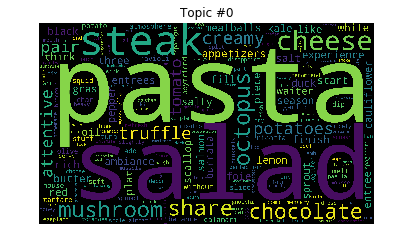

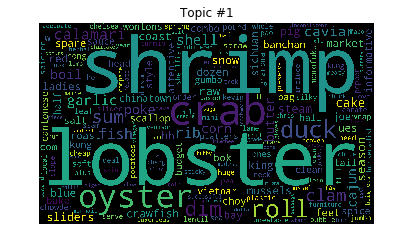

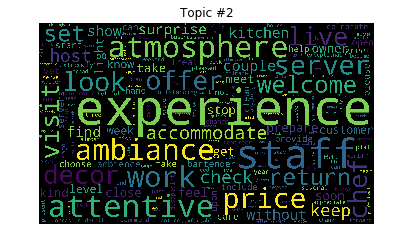

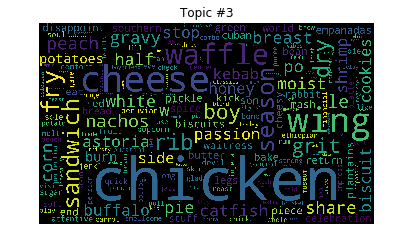

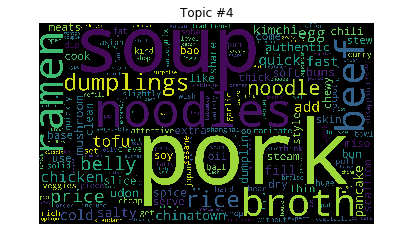

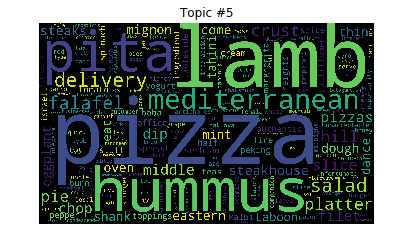

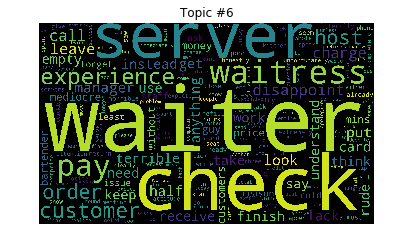

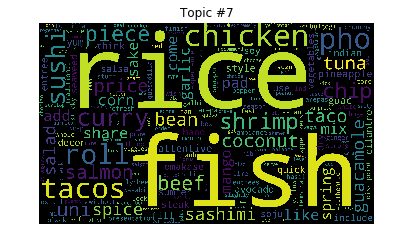

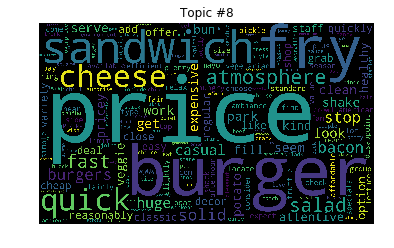

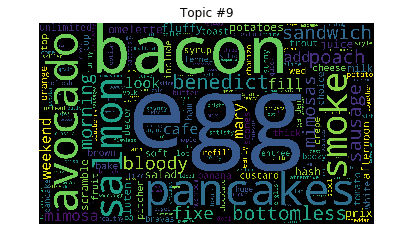

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80,60))
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud(width=1000, height=600, scale=5).fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [88]:
stops = ['thing', 'might', 'makes', 'eating', 'real', 'let', 'tried', 'far', 'reasonable', 'husband', 'truly',
        'pm', 'am', 'else', 'seemed', 'someone', 'good', 'like', 'really', 'place', 'would', 'pretty', 'bit', 'much',
        'better', 'great', 'amazing', 'place', 'delicous', 'back', 'good', 'definitely', 'best', 'love', 'recommend',
        'good', 'great', 'place', 'nice', 'really', 'bar', 'back', 'definitely', 'came', 'pretty', 'dish', 'ordered',
        'dessert', 'happy', 'hour', 'drinks', 'beer', 'bar', 'new', 'always', 'one', 'go', 'location', 'get', 'place',
        'york', 'us', 'time', 'table', 'one', 'order', 'get', 'came', 'would', 'back', 'even', 'course', 'waaaine',
        'dining', 'meal', 'course', 'dishes', 'impeccable', 'juicy', 'later', 'margarita', 'fine', 'hard', 'less',
        'especially', 'items', 'given', 'vietnamese', 'late', 'not', 'can', 'astoria', 'steakhouse', 'terrible', 'empty',
        'like']

In [ ]:
from gensim.test.utils import datapath
# Save model to disk.

ldamodel.save('ldabest.model')

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel2 = Lda(doc_term_matrix, num_topics=12, per_word_topics=True, id2word = dictionary, passes=50, random_state=55)


In [ ]:
ldamodel2.print_topics(num_topics=12, num_words=10)

In [107]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.192980  0.026100       1        1  24.162540
0      0.033710 -0.014240       2        1  16.142597
6      0.194055  0.026804       3        1  14.546941
4      0.084335  0.014441       4        1  10.374306
7      0.008952 -0.077457       5        1   8.857564
8      0.127856  0.029180       6        1   8.715008
9      0.012154  0.030447       7        1   5.379755
3     -0.092194 -0.064742       8        1   5.222517
1     -0.260791 -0.285130       9        1   3.815398
5     -0.301057  0.314597      10        1   2.783377, topic_info=     Category         Freq          Term        Total  loglift  logprob
645   Default  9290.000000       chicken  9290.000000  30.0000  30.0000
749   Default  5385.000000          pork  5385.000000  29.0000  29.0000
594   Default  4777.000000           egg  4777.000000  28.0000  28.0000
887   Default  4079.000000          soup  4079.000000  27.0000  27.0000
521   Default  5184.000000          rice  5184.000000  26.0000  26.0000
267   Default  3446.000000        shrimp  3446.000000  25.0000  25.0000
1568  Default  3669.000000       noodles  3669.000000  24.0000  24.0000
925   Default  3399.000000        burger  3399.000000  23.0000  23.0000
3434  Default  2099.000000         pizza  2099.000000  22.0000  22.0000
958   Default  2147.000000          lamb  2147.000000  21.0000  21.0000
206   Default  7529.000000         price  7529.000000  20.0000  20.0000
2948  Default  2176.000000       lobster  2176.000000  19.0000  19.0000
764   Default  5378.000000        cheese  5378.000000  18.0000  18.0000
883   Default  3509.000000           fry  3509.000000  17.0000  17.0000
230   Default  2121.000000          crab  2121.000000  16.0000  16.0000
107   Default  3698.000000          fish  3698.000000  15.0000  15.0000
10    Default  2068.000000        oyster  2068.000000  14.0000  14.0000
2384  Default  2767.000000         ramen  2767.000000  13.0000  13.0000
1617  Default  2601.000000          roll  2601.000000  12.0000  12.0000
714   Default  4920.000000         salad  4920.000000  11.0000  11.0000
128   Default  2967.000000         pasta  2967.000000  10.0000  10.0000
763   Default  2319.000000         broth  2319.000000   9.0000   9.0000
784   Default  3924.000000          beef  3924.000000   8.0000   8.0000
873   Default  1825.000000          duck  1825.000000   7.0000   7.0000
1539  Default  2051.000000     dumplings  2051.000000   6.0000   6.0000
1333  Default  1957.000000         bacon  1957.000000   5.0000   5.0000
1324  Default  2493.000000      sandwich  2493.000000   4.0000   4.0000
1589  Default  1665.000000           pho  1665.000000   3.0000   3.0000
16    Default  3487.000000        waiter  3487.000000   2.0000   2.0000
265   Default  4054.000000        server  4054.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
4907  Topic10   126.406700        office   127.337814   3.5742  -5.6244
3655  Topic10   124.840424        peking   125.771759   3.5741  -5.6368
4685  Topic10   116.004845          baba   116.935799   3.5735  -5.7102
4234  Topic10   115.716309         cream   116.647377   3.5735  -5.7127
2303  Topic10   115.355148         kalbi   116.286392   3.5735  -5.7158
4183  Topic10   114.421280    margherita   115.352242   3.5734  -5.7240
4977  Topic10   107.952660       israeli   108.883621   3.5729  -5.7822
4222  Topic10   105.431770       heights   106.362869   3.5727  -5.8058
5644  Topic10   102.079094     tableside   103.010376   3.5724  -5.8381
3600  Topic10   101.437393  unacceptable   102.368484   3.5724  -5.8444
4184  Topic10    99.913315          pies   100.844276   3.5722  -5.8596
1411  Topic10    99.628761       pretzel   100.559914   3.5722  -5.8624
958   Topic10  1815.269043          lamb  2147.302490   3.4135  -2.9599
2825  Topic10   178.714539          oven   216.647217   3.3890  -5.27